In [1]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-distilroberta-v1')
model.eval()
embeddings = model.encode(sentences)
print(embeddings)



[[-0.03375624 -0.06316338 -0.0316612  ...  0.03684864 -0.02036646
  -0.01574   ]
 [-0.01409588  0.00091114 -0.00096315 ... -0.02571585 -0.00289072
  -0.00579975]]


In [2]:
embeddings = model.encode(sentences)
print(embeddings.shape)

(2, 768)


In [3]:
model.parameters()

<generator object Module.parameters at 0x7f05da23b308>

In [2]:
import json


all_spans = {}

with open("../../mfc_v4.0/spans_no_context.json", "r") as f:
    all_spans = json.load(f)

keys = list(all_spans.keys())

for key in keys:
    if key[-2:] != '.0':
        del all_spans[key]
        
keys = list(all_spans.keys())
keys

['13.0',
 '6.0',
 '1.0',
 '14.0',
 '12.0',
 '2.0',
 '11.0',
 '9.0',
 '3.0',
 '10.0',
 '5.0',
 '8.0',
 '4.0',
 '7.0',
 '15.0']

In [3]:
import torch
import torch.nn as NN


class SentenceClassifier(NN.Module):
    def __init__(self, labels):
        
        super().__init__()
        
        self.transformer = SentenceTransformer('sentence-transformers/all-distilroberta-v1')
        for params in self.transformer.parameters():
            params.requires_grad = False
        
        self.fc = NN.Linear(768, len(labels))
        self.logits = NN.Softmax()
        self.labels = labels
    
    def forward(self, x):
        return self.logits(self.fc(torch.tensor(self.transformer.encode(x))))
    




# x = []
# y = []

# count = 0

# n_spans = sum(len(all_spans[key]) for key in all_spans)

# batch_x = []
# batch_y = []



# with torch.no_grad():
#     for label in all_spans:
#         if count > 100:
#             break
#         for span in all_spans[label]:
#             count += 1
#             batch_x.append(span)
#             batch_y.append(label)
#             if len(batch_x) == 60:
#                 tokenized = tokenizer(batch_x, return_tensors='pt', padding=True)
#                 output = model(**tokenized)
#                 x.append(output.last_hidden_state)
#                 y.append(batch_y)
#                 batch_x = []
#                 batch_y = []
#             if count % 100 == 0:
#                 print("Embedding for span %d of %d computed" % (count, n_spans))
#                 print(x[-1].shape)

In [50]:
import random

565299

In [57]:
len(y_batches)

282

In [64]:
data = []

for i,key in enumerate(all_spans):
    for span in all_spans[key]:
        data.append((span, i))

data = [ (d[0],[1 if i == d[1] else 0 for i in range(len(all_spans.keys()))]) for d in data]

random.shuffle(data)

loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 5e-4

model = SentenceClassifier(list(all_spans.keys()))
model.train()

train_losses = []
test_losses = []

optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)


test_x = [d[0] for d in data[:2000]]
test_y = torch.tensor([d[1] for d in data[:2000]], dtype=torch.float)

train_data = data[2000:]

for epoch in range(5):
    
    print("Starting training epoch", epoch)
    
    random.shuffle(train_data)

    train_x = [d[0] for d in train_data]
    train_y = [d[1] for d in train_data]

    x_batches = []
    y_batches = []
    
    for i in range(len(train_data)//2000):
        batch_x = train_x[i*2000:(i+1)*2000]
        batch_y = torch.tensor(train_y[i*2000:(i+1)*2000], dtype=torch.float)
        x_batches.append(batch_x)
        y_batches.append(batch_y)

    for step in range(len(x_batches)):

        y_train_pred = model(x_batches[step])
        train_loss = loss_fn(y_train_pred, y_batches[step])
        train_losses.append(train_loss)

        print("Training Loss at step",step,":",train_loss.item())

        optimizer.zero_grad()

        train_loss.backward()

        optimizer.step()

        if step % 10 == 0:
            y_test_pred = model(test_x)
            test_loss = loss_fn(y_test_pred, test_y)
            test_losses.append(test_loss)
            print("Test Loss",test_loss.item(),"\n")

Starting training epoch 0


/home/sam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Training Loss at step 0 : 1868.222412109375
Test Loss 1858.1199951171875 

Training Loss at step 1 : 1857.4749755859375
Training Loss at step 2 : 1849.923095703125
Training Loss at step 3 : 1843.0841064453125
Training Loss at step 4 : 1836.74462890625
Training Loss at step 5 : 1832.6336669921875
Training Loss at step 6 : 1828.0020751953125
Training Loss at step 7 : 1824.6148681640625
Training Loss at step 8 : 1821.1578369140625
Training Loss at step 9 : 1814.9979248046875
Training Loss at step 10 : 1812.6513671875
Test Loss 1811.1109619140625 

Training Loss at step 11 : 1809.430419921875
Training Loss at step 12 : 1803.488525390625
Training Loss at step 13 : 1799.546875
Training Loss at step 14 : 1798.8201904296875
Training Loss at step 15 : 1796.674072265625
Training Loss at step 16 : 1791.3427734375
Training Loss at step 17 : 1790.881103515625
Training Loss at step 18 : 1785.1810302734375
Training Loss at step 19 : 1783.4910888671875
Training Loss at step 20 : 1778.3236083984375
Tes

Test Loss 1545.2646484375 

Training Loss at step 171 : 1525.574462890625
Training Loss at step 172 : 1524.8558349609375
Training Loss at step 173 : 1520.491455078125
Training Loss at step 174 : 1523.1361083984375
Training Loss at step 175 : 1517.47412109375
Training Loss at step 176 : 1520.424072265625
Training Loss at step 177 : 1523.218017578125
Training Loss at step 178 : 1516.8896484375
Training Loss at step 179 : 1526.5234375
Training Loss at step 180 : 1524.77978515625
Test Loss 1534.85546875 

Training Loss at step 181 : 1528.162109375
Training Loss at step 182 : 1513.0426025390625
Training Loss at step 183 : 1517.9013671875
Training Loss at step 184 : 1519.04052734375
Training Loss at step 185 : 1506.4822998046875
Training Loss at step 186 : 1513.703369140625
Training Loss at step 187 : 1534.5218505859375
Training Loss at step 188 : 1503.529296875
Training Loss at step 189 : 1520.7135009765625
Training Loss at step 190 : 1514.23046875
Test Loss 1524.8695068359375 

Training Lo

Training Loss at step 59 : 1382.5343017578125
Training Loss at step 60 : 1382.1385498046875
Test Loss 1403.2335205078125 

Training Loss at step 61 : 1357.2255859375
Training Loss at step 62 : 1416.2587890625
Training Loss at step 63 : 1353.314208984375
Training Loss at step 64 : 1398.02001953125
Training Loss at step 65 : 1379.669189453125
Training Loss at step 66 : 1376.7603759765625
Training Loss at step 67 : 1362.9620361328125
Training Loss at step 68 : 1404.33154296875
Training Loss at step 69 : 1406.15234375
Training Loss at step 70 : 1408.9962158203125
Test Loss 1396.64453125 

Training Loss at step 71 : 1359.426513671875
Training Loss at step 72 : 1385.41015625
Training Loss at step 73 : 1367.0426025390625
Training Loss at step 74 : 1399.64892578125
Training Loss at step 75 : 1380.9686279296875
Training Loss at step 76 : 1362.0601806640625
Training Loss at step 77 : 1373.19873046875
Training Loss at step 78 : 1364.6058349609375
Training Loss at step 79 : 1383.7236328125
Trainin

Training Loss at step 228 : 1260.852783203125
Training Loss at step 229 : 1280.31103515625
Training Loss at step 230 : 1289.2547607421875
Test Loss 1307.501220703125 

Training Loss at step 231 : 1271.624267578125
Training Loss at step 232 : 1279.506591796875
Training Loss at step 233 : 1291.279296875
Training Loss at step 234 : 1283.66015625
Training Loss at step 235 : 1294.265869140625
Training Loss at step 236 : 1279.3817138671875
Training Loss at step 237 : 1271.9676513671875
Training Loss at step 238 : 1294.8349609375
Training Loss at step 239 : 1257.4254150390625
Training Loss at step 240 : 1301.2109375
Test Loss 1302.6484375 

Training Loss at step 241 : 1293.7587890625
Training Loss at step 242 : 1278.7684326171875
Training Loss at step 243 : 1300.623779296875
Training Loss at step 244 : 1272.8924560546875
Training Loss at step 245 : 1284.9464111328125
Training Loss at step 246 : 1282.62109375
Training Loss at step 247 : 1278.336181640625
Training Loss at step 248 : 1280.644287

Training Loss at step 117 : 1230.3494873046875
Training Loss at step 118 : 1211.662353515625
Training Loss at step 119 : 1217.0941162109375
Training Loss at step 120 : 1198.3387451171875
Test Loss 1237.392333984375 

Training Loss at step 121 : 1232.5809326171875
Training Loss at step 122 : 1229.1885986328125
Training Loss at step 123 : 1233.0313720703125
Training Loss at step 124 : 1237.5166015625
Training Loss at step 125 : 1202.951416015625
Training Loss at step 126 : 1195.99072265625
Training Loss at step 127 : 1211.8790283203125
Training Loss at step 128 : 1211.943115234375
Training Loss at step 129 : 1195.049072265625
Training Loss at step 130 : 1182.4150390625
Test Loss 1233.848876953125 

Training Loss at step 131 : 1245.3917236328125
Training Loss at step 132 : 1209.510009765625
Training Loss at step 133 : 1169.7625732421875
Training Loss at step 134 : 1191.270751953125
Training Loss at step 135 : 1209.239501953125
Training Loss at step 136 : 1201.0711669921875
Training Loss a

Training Loss at step 3 : 1174.1744384765625
Training Loss at step 4 : 1162.0469970703125
Training Loss at step 5 : 1172.4268798828125
Training Loss at step 6 : 1138.0657958984375
Training Loss at step 7 : 1166.4063720703125
Training Loss at step 8 : 1176.197265625
Training Loss at step 9 : 1176.4366455078125
Training Loss at step 10 : 1151.728271484375
Test Loss 1185.977783203125 

Training Loss at step 11 : 1180.3331298828125
Training Loss at step 12 : 1160.28759765625
Training Loss at step 13 : 1160.55419921875
Training Loss at step 14 : 1169.2099609375
Training Loss at step 15 : 1124.197021484375
Training Loss at step 16 : 1171.75439453125
Training Loss at step 17 : 1163.45703125
Training Loss at step 18 : 1153.32666015625
Training Loss at step 19 : 1152.4873046875
Training Loss at step 20 : 1202.395263671875
Test Loss 1183.2950439453125 

Training Loss at step 21 : 1154.4072265625
Training Loss at step 22 : 1144.1990966796875
Training Loss at step 23 : 1140.597412109375
Training L

Training Loss at step 174 : 1159.4443359375
Training Loss at step 175 : 1132.3023681640625
Training Loss at step 176 : 1110.9798583984375
Training Loss at step 177 : 1110.9029541015625
Training Loss at step 178 : 1119.7078857421875
Training Loss at step 179 : 1131.437255859375
Training Loss at step 180 : 1121.8316650390625
Test Loss 1147.9083251953125 

Training Loss at step 181 : 1151.67236328125
Training Loss at step 182 : 1082.86865234375
Training Loss at step 183 : 1106.83154296875
Training Loss at step 184 : 1145.2127685546875
Training Loss at step 185 : 1115.81787109375
Training Loss at step 186 : 1127.125732421875
Training Loss at step 187 : 1140.0703125
Training Loss at step 188 : 1123.3162841796875
Training Loss at step 189 : 1130.07666015625
Training Loss at step 190 : 1113.6214599609375
Test Loss 1146.045654296875 

Training Loss at step 191 : 1127.7913818359375
Training Loss at step 192 : 1112.5863037109375
Training Loss at step 193 : 1132.5804443359375
Training Loss at ste

Training Loss at step 62 : 1075.0015869140625
Training Loss at step 63 : 1126.9097900390625
Training Loss at step 64 : 1081.0462646484375
Training Loss at step 65 : 1067.6912841796875
Training Loss at step 66 : 1114.36572265625
Training Loss at step 67 : 1097.0784912109375
Training Loss at step 68 : 1114.0009765625
Training Loss at step 69 : 1118.1849365234375
Training Loss at step 70 : 1110.9488525390625
Test Loss 1120.8388671875 

Training Loss at step 71 : 1114.8939208984375
Training Loss at step 72 : 1089.768798828125
Training Loss at step 73 : 1074.716796875
Training Loss at step 74 : 1104.423828125
Training Loss at step 75 : 1110.311279296875
Training Loss at step 76 : 1062.760498046875
Training Loss at step 77 : 1100.7301025390625
Training Loss at step 78 : 1095.9246826171875
Training Loss at step 79 : 1092.065673828125
Training Loss at step 80 : 1090.5928955078125
Test Loss 1119.559814453125 

Training Loss at step 81 : 1070.8499755859375
Training Loss at step 82 : 1094.9923095

Training Loss at step 231 : 1075.86279296875
Training Loss at step 232 : 1083.8201904296875
Training Loss at step 233 : 1118.0755615234375
Training Loss at step 234 : 1093.5516357421875
Training Loss at step 235 : 1095.54541015625
Training Loss at step 236 : 1063.7518310546875
Training Loss at step 237 : 1078.0076904296875
Training Loss at step 238 : 1076.435546875
Training Loss at step 239 : 1052.4671630859375
Training Loss at step 240 : 1076.060791015625
Test Loss 1100.9549560546875 

Training Loss at step 241 : 1091.9854736328125
Training Loss at step 242 : 1075.293212890625
Training Loss at step 243 : 1056.3487548828125
Training Loss at step 244 : 1106.1517333984375
Training Loss at step 245 : 1072.837890625
Training Loss at step 246 : 1093.38232421875
Training Loss at step 247 : 1058.9580078125
Training Loss at step 248 : 1056.9599609375
Training Loss at step 249 : 1091.85205078125
Training Loss at step 250 : 1075.8927001953125
Test Loss 1099.9345703125 

Training Loss at step 251

In [65]:
train_losses = train_losses[:-1]

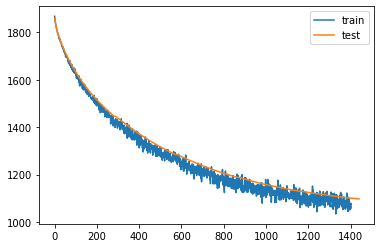

In [66]:
from matplotlib import pyplot as plt

train_domain = list(range(len(train_losses)))
test_domain = ([i*10 for i in range(len(test_losses))])

plt.plot(train_domain, train_losses, label="train")
plt.plot(test_domain, test_losses, label="test")

plt.legend()

plt.show()

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [67]:
torch.save(model.state_dict(), "./distilberta-mfc-no-context.pt")

In [6]:
model_reloaded = SentenceClassifier(list(all_spans.keys()))
model_reloaded.load_state_dict(torch.load("./distilberta-mfc-no-context.pt", map_location=device))

<All keys matched successfully>

In [7]:
test_str = "shipping lines cannot support demand"
keys = list(all_spans.keys())
print(keys[int(torch.argmax(model_reloaded([test_str])))])
print(keys[int(torch.argmax(model([test_str])))])

1.0


/home/sam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


TypeError: list indices must be integers or slices, not str

In [70]:
del model_reloaded

In [76]:
labels = list(all_spans.keys())

pred = int(torch.argmax(test))

labels[pred]

'1.0'

In [5]:
from torch import NN

class robertaClassifier(nn.Module):
    def __init__():
        pretrained = RobertaModel.from_pretrained('roberta-base')
        padder = F.pad

ImportError: cannot import name 'NN'